'lc' Datasets and Options
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

Dataset Parameters
--------------------------

Let's add a lightcurve dataset to the Bundle.

In [3]:
b.add_dataset('lc')
print b.filter(kind='lc')

ParameterSet: 3 parameters
              times@lc01@dataset: [] d
             fluxes@lc01@dataset: [] W / m2
             sigmas@lc01@dataset: [] W / m2


In [4]:
print b.filter(kind='lc_dep')

ParameterSet: 9 parameters
           passband@lc01@dataset: Johnson:V
   intens_weighting@lc01@dataset: energy
                 l3@lc01@dataset: 0.0 W / m3
            exptime@lc01@dataset: 0.0 s
    ld_func@primary@lc01@dataset: interp
  ld_func@secondary@lc01@dataset: interp
  pblum_ref@primary@lc01@dataset: self
  pblum_ref@secondary@lc01@da...: primary
      pblum@primary@lc01@dataset: 12.5663706144 W


### times

In [5]:
print b['times']

Parameter: times@lc01@dataset
                       Qualifier: times
                     Description: Observed times
                           Value: [] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



### fluxes

In [6]:
print b['fluxes']

Parameter: fluxes@lc01@dataset
                       Qualifier: fluxes
                     Description: Observed flux
                           Value: [] W / m2
                  Constrained by: 
                      Constrains: None
                      Related to: None



### sigmas

In [7]:
print b['sigmas']

Parameter: sigmas@lc01@dataset
                       Qualifier: sigmas
                     Description: Observed uncertainty on flux
                           Value: [] W / m2
                  Constrained by: 
                      Constrains: None
                      Related to: None



### ld_func

In [8]:
print b['ld_func@primary']

Parameter: ld_func@primary@lc01@dataset
                       Qualifier: ld_func
                     Description: Limb darkening model
                           Value: interp
                         Choices: interp, linear, logarithmic, quadratic, square_root, power



### ld_coeffs

ld_coeffs will only be available if ld_func is not interp, so let's set it to logarithmic

In [9]:
b['ld_func@primary'] = 'logarithmic'

In [10]:
print b['ld_coeffs@primary']

Parameter: ld_coeffs@primary@lc01@dataset
                       Qualifier: ld_coeffs
                     Description: Limb darkening coefficients
                           Value: [0.5 0.5]
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: ld_func:!interp



### passband

In [11]:
print b['passband']

Parameter: passband@lc01@dataset
                       Qualifier: passband
                     Description: Passband
                           Value: Johnson:V
                         Choices: Stromgren:b, Brite:B, Stromgren:v, Gaia:BP, Stromgren:u, Brite:R, Stromgren:y, Johnson:B, Gaia:RP, Tycho:VT, Bolometric:900-40000, Johnson:R, Johnson:V, Johnson:U, Kepler:mean, Gaia:G, Tycho:BT, Hipparcos:Hp, KELT:R, LSST:i, LSST:g, Cousins:R, Cousins:I, LSST:z, LSST:y, LSST:u, LSST:r



### intens_weighting

See the [Intensity Weighting tutorial](intens_weighting)

In [12]:
print b['intens_weighting']

Parameter: intens_weighting@lc01@dataset
                       Qualifier: intens_weighting
                     Description: Whether passband intensities are weighted by energy of photons
                           Value: energy
                         Choices: energy, photon



### pblum

See the [Passband Luminosity tutorial](pblum)

In [13]:
print b['pblum']

Parameter: pblum@primary@lc01@dataset
                       Qualifier: pblum
                     Description: Passband luminosity (defined at t0)
                           Value: 12.5663706144 W
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: pblum_ref:self



### l3

See the ["Third" Light tutorial](l3)

In [14]:
print b['l3']

Parameter: l3@lc01@dataset
                       Qualifier: l3
                     Description: Third light
                           Value: 0.0 W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to computing fluxes and the LC dataset.

Other compute options are covered elsewhere:
* parameters related to dynamics are explained in the section on the [orb dataset](ORB)
* parameters related to meshing, eclipse detection, and subdivision are explained in the section on the [mesh dataset](MESH)

In [15]:
print b['compute']

ParameterSet: 17 parameters
  dynamics_method@phoebe01@co...: keplerian
           ltte@phoebe01@compute: False
   irrad_method@phoebe01@compute: wilson
  boosting_method@phoebe01@co...: none
  eclipse_method@phoebe01@com...: native
  horizon_method@phoebe01@com...: boolean
  mesh_method@primary@phoebe0...: marching
  mesh_method@secondary@phoeb...: marching
  ntriangles@primary@phoebe01...: 1500
  ntriangles@secondary@phoebe...: 1500
  distortion_method@primary@p...: roche
  distortion_method@secondary...: roche
    atm@primary@phoebe01@compute: ck2004
  atm@secondary@phoebe01@compute: ck2004
   enabled@lc01@phoebe01@compute: True
  lc_method@lc01@phoebe01@com...: numerical
  fti_method@lc01@phoebe01@co...: none


### lc_method

In [16]:
print b['lc_method']

Parameter: lc_method@lc01@phoebe01@compute
                       Qualifier: lc_method
                     Description: Method to use for computing LC fluxes
                           Value: numerical
                         Choices: numerical



### irrad_method

In [17]:
print b['irrad_method']

Parameter: irrad_method@phoebe01@compute
                       Qualifier: irrad_method
                     Description: Which method to use to handle all irradiation effects (reflection, redistribution)
                           Value: wilson
                         Choices: none, wilson, horvat



### boosting_method

In [18]:
print b['boosting_method']

Parameter: boosting_method@phoebe01@compute
                       Qualifier: boosting_method
                     Description: Type of boosting method
                           Value: none
                         Choices: none, linear



For more details on boosting, see the [Beaming and Boosting example script](../examples/beaming_boosting)

### atm

In [19]:
print b['atm@primary']

Parameter: atm@primary@phoebe01@compute
                       Qualifier: atm
                     Description: Atmosphere table
                           Value: ck2004
                         Choices: blackbody, ck2004, extern_planckint, extern_atmx



For more details on heating, see the [Reflection and Heating example script](../examples/reflection_heating)

Synthetics
------------------

In [20]:
b.set_value('times', np.linspace(0,1,101))

In [21]:
b.run_compute()

<ParameterSet: 2 parameters | qualifiers: fluxes, times>

In [22]:
b['lc@model'].twigs

['times@lc01@phoebe01@latest@lc@model', 'fluxes@lc01@phoebe01@latest@lc@model']

In [23]:
print b['times@lc@model']

Parameter: times@lc01@latest@model
                       Qualifier: times
                     Description: Observed times
                           Value: [0.   0.01 0.02 ... 0.98 0.99 1.  ] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [24]:
print b['fluxes@lc@model']

Parameter: fluxes@lc01@latest@model
                       Qualifier: fluxes
                     Description: Observed flux
                           Value: [0.82298001 1.0192052  1.2297354  ... 1.22960077 1.01932778
 0.82298001] W / m2
                  Constrained by: 
                      Constrains: None
                      Related to: None



Plotting
---------------

By default, LC datasets plot as flux vs time.

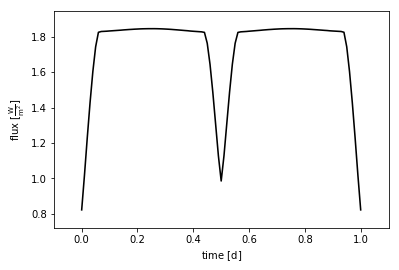

In [25]:
afig, mplfig = b['lc@model'].plot(show=True)

Since these are the only two columns available in the synthetic model, the only other option is to plot in phase instead of time.

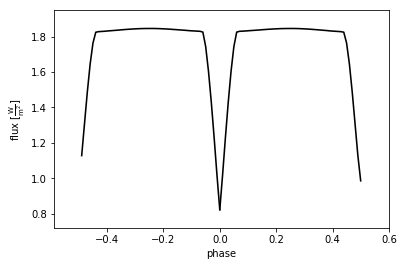

In [26]:
afig, mplfig = b['lc@model'].plot(x='phases', show=True)

In system hierarchies where there may be multiple periods, it is also possible to determine whose period to use for phasing.

In [27]:
b['period'].components

['binary', 'primary', 'secondary']

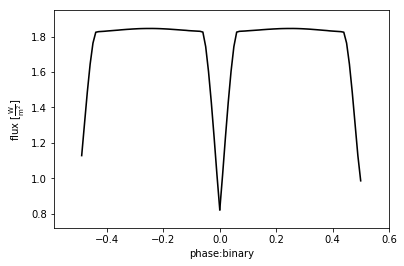

In [28]:
afig, mplfig = b['lc@model'].plot(x='phases:binary', show=True)

Mesh Fields
---------------------

By adding a mesh dataset and setting the columns parameter, light-curve (i.e. passband-dependent) per-element quantities can be exposed and plotted.

Let's add a single mesh at the first time of the light-curve and re-call run_compute

In [29]:
b.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 4 parameters | contexts: compute, dataset>

In [30]:
print b['columns'].choices

['pot', 'rpole', 'volume', 'xs', 'ys', 'zs', 'vxs', 'vys', 'vzs', 'nxs', 'nys', 'nzs', 'us', 'vs', 'ws', 'vus', 'vvs', 'vws', 'nus', 'nvs', 'nws', 'areas', 'loggs', 'teffs', 'rprojs', 'mus', 'visibilities', 'visible_centroids', 'rs', 'intensities@lc01', 'normal_intensities@lc01', 'abs_intensities@lc01', 'abs_normal_intensities@lc01', 'boost_factors@lc01', 'ldint@lc01', 'pblum@lc01', 'abs_pblum@lc01', 'ptfarea@lc01']


In [31]:
b['columns'] = ['intensities@lc01', 'abs_intensities@lc01', 'normal_intensities@lc01', 'abs_normal_intensities@lc01', 'pblum@lc01', 'boost_factors@lc01']

In [32]:
b.run_compute()

Thu, 04 Oct 2018 15:07 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 20 parameters | kinds: mesh, lc>

In [33]:
print b['model'].datasets

['mesh01', 'lc01']


These new columns are stored with the lc's dataset tag, but with the 'mesh' dataset-kind.

In [34]:
b.filter(dataset='lc01', kind='mesh', context='model').twigs

['00.000000@intensities@primary@lc01@phoebe01@latest@mesh@model',
 '00.000000@normal_intensities@primary@lc01@phoebe01@latest@mesh@model',
 '00.000000@abs_intensities@primary@lc01@phoebe01@latest@mesh@model',
 '00.000000@abs_normal_intensities@primary@lc01@phoebe01@latest@mesh@model',
 '00.000000@boost_factors@primary@lc01@phoebe01@latest@mesh@model',
 '00.000000@pblum@primary@lc01@phoebe01@latest@mesh@model',
 '00.000000@intensities@secondary@lc01@phoebe01@latest@mesh@model',
 '00.000000@normal_intensities@secondary@lc01@phoebe01@latest@mesh@model',
 '00.000000@abs_intensities@secondary@lc01@phoebe01@latest@mesh@model',
 '00.000000@abs_normal_intensities@secondary@lc01@phoebe01@latest@mesh@model',
 '00.000000@boost_factors@secondary@lc01@phoebe01@latest@mesh@model',
 '00.000000@pblum@secondary@lc01@phoebe01@latest@mesh@model']

Any of these columns are then available to use as edge or facecolors when plotting the mesh (see the section on the [mesh dataset](MESH)).

/usr/lib/python2.7/dist-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


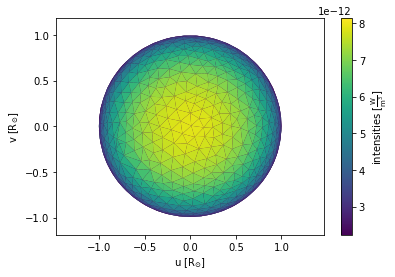

In [35]:
afig, mplfig = b['mesh01@model'].plot(fc='intensities', ec='None', show=True)

Now let's look at each of the available fields.

### pblum

For more details, see the tutorial on [Passband Luminosities](pblum)

In [36]:
print b['pblum@primary@lc01@mesh@model']

Parameter: 00.000000@pblum@primary@latest@model
                       Qualifier: pblum
                     Description: Passband Luminosity of entire star (after pblum scaling)
                           Value: 12.6416483695 W
                  Constrained by: 
                      Constrains: None
                      Related to: None



'pblum' is the passband luminosity of the entire star/mesh - this is a single value (unlike most of the parameters in the mesh) and does not have per-element values.

### abs_normal_intensities

In [37]:
print b['abs_normal_intensities@primary@lc01@mesh@model']

Parameter: 00.000000@abs_normal_intensities@primary@latest@model
                       Qualifier: abs_normal_intensities
                     Description: Per-element value of abs_normal_intensities for lc01 dataset
                           Value: [4.28951233e+13 4.28969410e+13 4.28949679e+13 ... 4.18387189e+13
 4.18324864e+13 4.18574089e+13] W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



'abs_normal_intensities' are the absolute normal intensities per-element.

### normal_intensities

In [38]:
print b['normal_intensities@primary@lc01@mesh@model']

Parameter: 00.000000@normal_intensities@primary@latest@model
                       Qualifier: normal_intensities
                     Description: Per-element value of normal_intensities for lc01 dataset
                           Value: [8.16196651e-12 8.16231237e-12 8.16193694e-12 ... 7.96095678e-12
 7.95977087e-12 7.96451306e-12] W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



'normal_intensities' are the relative normal intensities per-element.

### abs_intensities

In [39]:
print b['abs_intensities@primary@lc01@mesh@model']

Parameter: 00.000000@abs_intensities@primary@latest@model
                       Qualifier: abs_intensities
                     Description: Per-element value of abs_intensities for lc01 dataset
                           Value: [4.28943579e+13 4.28961603e+13 4.28942025e+13 ...            nan
            nan            nan] W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



'abs_intensities' are the projected absolute intensities (towards the observer) per-element.

### intensities

In [40]:
print b['intensities@primary@lc01@mesh@model']

Parameter: 00.000000@intensities@primary@latest@model
                       Qualifier: intensities
                     Description: Per-element value of intensities for lc01 dataset
                           Value: [8.16182088e-12 8.16216383e-12 8.16179131e-12 ...            nan
            nan            nan] W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



'intensities' are the projected relative intensities (towards the observer) per-element.

### boost_factors

In [41]:
print b['boost_factors@primary@lc01@mesh@model']

Parameter: 00.000000@boost_factors@primary@latest@model
                       Qualifier: boost_factors
                     Description: Per-element value of boost_factors for lc01 dataset
                           Value: [1. 1. 1. ... 1. 1. 1.]
                  Constrained by: 
                      Constrains: None
                      Related to: None



'boost_factors' are the boosting amplitudes per-element.